In [7]:
library(tidyverse)
library(lubridate)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ ggplot2 2.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
Warning message:
“package ‘lubridate’ was built under R version 3.4.4”
Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



# Lecture 13: Factors & dates

In this lecture we will formally introduce `factor`s (despite having worked with them before.) We'll also cover some functions for working with dates. The suggested reading for this lecture are Chapter [15](https://r4ds.had.co.nz/factors.html) and Section [16.2](https://r4ds.had.co.nz/dates-and-times.html#creating-datetimes) of R4DS.

## Factors
Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values. 

In [350]:
birth_months = c("Jan", "Feb", "Sep", "Sep", "Dec", "Jan", "Jul", "Aug")  # categorical variable

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` are `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [351]:
month.abb

 [1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [352]:
(birth_months_fac = factor(birth_months, levels=month.abb))

[1] Jan Feb Sep Sep Dec Jan Jul Aug
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you don't specify the levels, R will infer them based on all the observed values of the variable:

In [353]:
factor(birth_months)

[1] Jan Feb Sep Sep Dec Jan Jul Aug
Levels: Aug Dec Feb Jan Jul Sep

It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [354]:
bad = c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")
#                               ^ note typo
factor(bad)
factor(bad, levels=month.abb)

[1] Jan Feb Sep Ser Dec Jan Jul Aug
Levels: Aug Dec Feb Jan Jul Sep Ser

[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [9]:
library(forcats)

`forcats` commands are prefixed by `fct_` (compare `stringr`).

For the rest of the examples, we'll use a data set included in `forcats` called `gss_cat`. This is a standard data set from the General Social Survey which contains a lot of categorical variables:

In [10]:
print(forcats::gss_cat)

# A tibble: 21,483 x 9
    year marital         age race  rincome        partyid  relig  denom tvhours
   <int> <fct>         <int> <fct> <fct>          <fct>    <fct>  <fct>   <int>
 1  2000 Never married    26 White $8000 to 9999  Ind,nea… Prote… Sout…      12
 2  2000 Divorced         48 White $8000 to 9999  Not str… Prote… Bapt…      NA
 3  2000 Widowed          67 White Not applicable Indepen… Prote… No d…       2
 4  2000 Never married    39 White Not applicable Ind,nea… Ortho… Not …       4
 5  2000 Divorced         25 White Not applicable Not str… None   Not …       1
 6  2000 Married          25 White $20000 - 24999 Strong … Prote… Sout…      NA
 7  2000 Never married    36 White $25000 or more Not str… Chris… Not …       3
 8  2000 Divorced         44 White $7000 to 7999  Ind,nea… Prote… Luth…      NA
 9  2000 Married          44 White $25000 or more Not str… Prote… Other       0
10  2000 Married          47 White $25000 or more Strong … Prote… Sout…       3
# ... with 21,473

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [358]:
sort(birth_months)
sort(birth_months_fac)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

[1] Jan Jan Feb Jul Aug Sep Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [359]:
levels(birth_months_fac)
levels(factor(birth_months))

 [1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

[1] "Aug" "Dec" "Feb" "Jan" "Jul" "Sep"

There are several options for reordering factor levels. The first is `fct_reorder` which we have already seen. It reorders a factor based on the values of another continuous variable.

In [360]:
relig_summary = gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print

# A tibble: 15 x 4
                     relig      age  tvhours     n
                    <fctr>    <dbl>    <dbl> <int>
 1               No answer 49.49412 2.723404    93
 2              Don't know 35.93333 4.625000    15
 3 Inter-nondenominational 39.96330 2.870370   109
 4         Native american 38.86957 3.461538    23
 5               Christian 40.05240 2.790281   689
 6      Orthodox-christian 50.42105 2.416667    95
 7            Moslem/islam 37.62136 2.437500   104
 8           Other eastern 45.90625 1.666667    32
 9                Hinduism 37.67143 1.891892    71
10                Buddhism 44.69388 2.382716   147
11                   Other 41.04054 2.725806   224
12                    None 41.16392 2.710227  3523
13                  Jewish 52.39535 2.518519   388
14                Catholic 46.90825 2.960297  5124
15              Protestant 49.90422 3.145487 10846


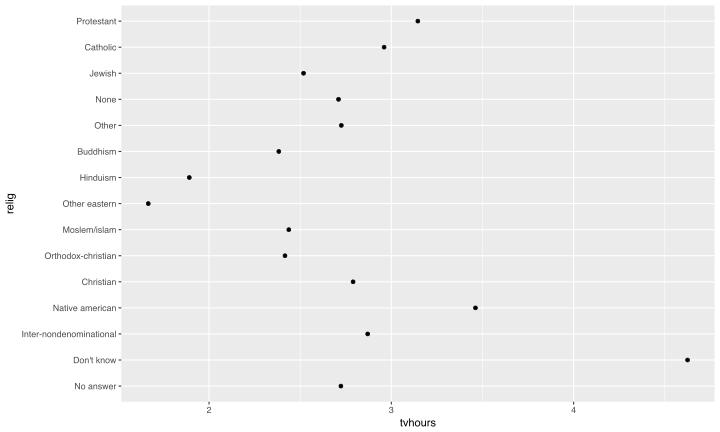

In [361]:
ggplot(relig_summary) + geom_point(aes(tvhours, relig))

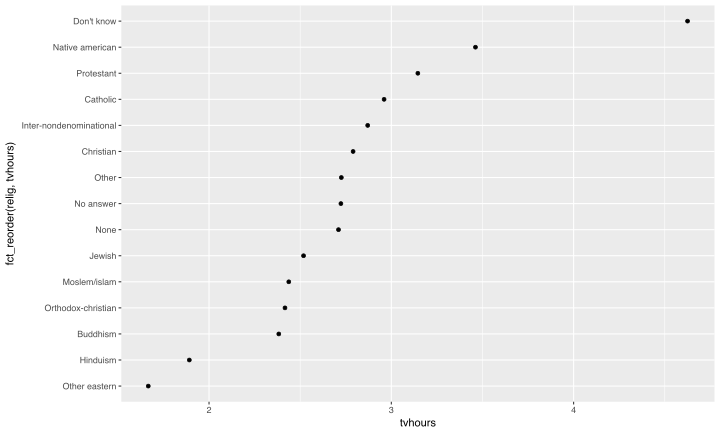

In [362]:
ggplot(relig_summary) + geom_point(aes(tvhours, fct_reorder(relig, tvhours)))

Let's try visualizing income by age:

In [363]:
rincome_summary = gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print

# A tibble: 16 x 4
          rincome      age  tvhours     n
           <fctr>    <dbl>    <dbl> <int>
 1      No answer 45.45029 2.904762   183
 2     Don't know 45.60902 3.411290   267
 3        Refused 47.61082 2.481973   975
 4 $25000 or more 44.21217 2.234208  7363
 5 $20000 - 24999 41.53365 2.784753  1283
 6 $15000 - 19999 39.96180 2.912245  1048
 7 $10000 - 14999 41.11301 3.016541  1168
 8  $8000 to 9999 41.08235 3.148571   340
 9  $7000 to 7999 38.24468 2.645455   188
10  $6000 to 6999 40.29907 3.174312   215
11  $5000 to 5999 37.81057 3.163793   227
12  $4000 to 4999 38.87500 3.145299   226
13  $3000 to 3999 37.82182 3.312102   276
14  $1000 to 2999 34.54430 3.004525   395
15       Lt $1000 40.51049 3.361842   286
16 Not applicable 56.10628 3.791468  7043


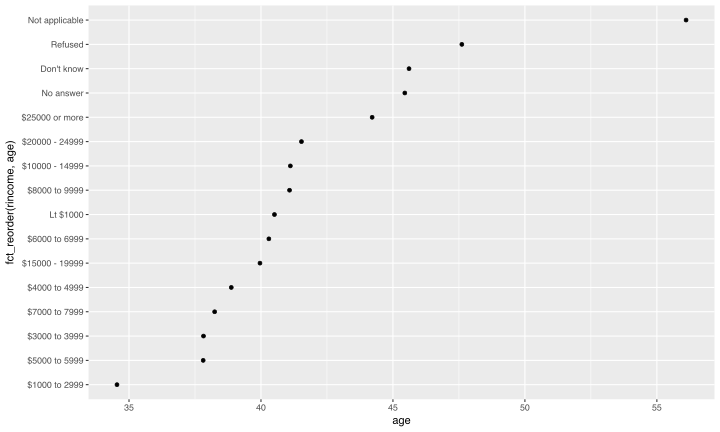

In [364]:
ggplot(rincome_summary) + geom_point(aes(age, fct_reorder(rincome, age)))

The plot may look visually appealing but the $y$-axis is totally jumbled! This shows that we only use `fct_reorder` in cases where there is not already a natural order. 

Nevertheless, there are a few categories that can be sensibly broken out: `No answer`, `Not applicable`, `Don't Know` and `Refused`. The command `fct_relevel(f, lvls)` takes a factor `f` and returns a new factor which has the vector `lvls` of factor levels placed at the front:

In [365]:
rincome_summary$rincome
fct_relevel(rincome_summary$rincome, 'Not applicable')

 [1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: No answer Don't know Refused $25000 or more ... Not applicable

 [1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: Not applicable No answer Don't know Refused ... Lt $1000

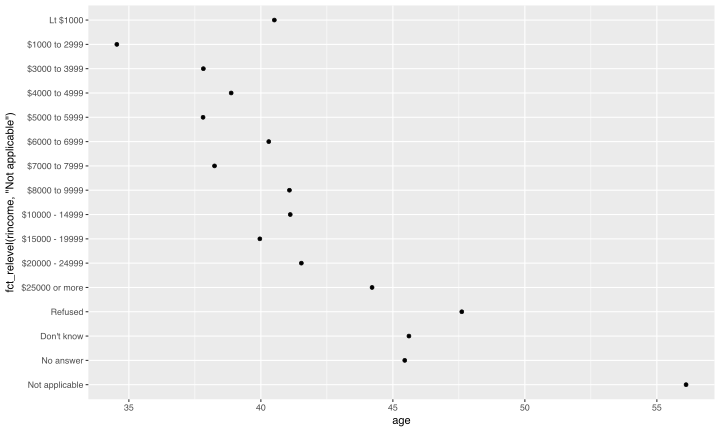

In [366]:
ggplot(rincome_summary) + geom_point(aes(age, fct_relevel(rincome, 'Not applicable')))

### 2D reordering
Another type of reordering is useful for coloring lines on a plot. `fct_reorder2` reorders the factor by the y values associated with the largest x values. This makes the plot easier to read because the line colours line up with the legend.

Let's try visualizing the proportion of married, divorced, etc. as people age:

In [367]:
by_age = gss_cat %>%
    filter(!is.na(age)) %>%
    group_by(age, marital) %>%
    count() %>% group_by(age) %>% 
    mutate(prop = n/sum(n))

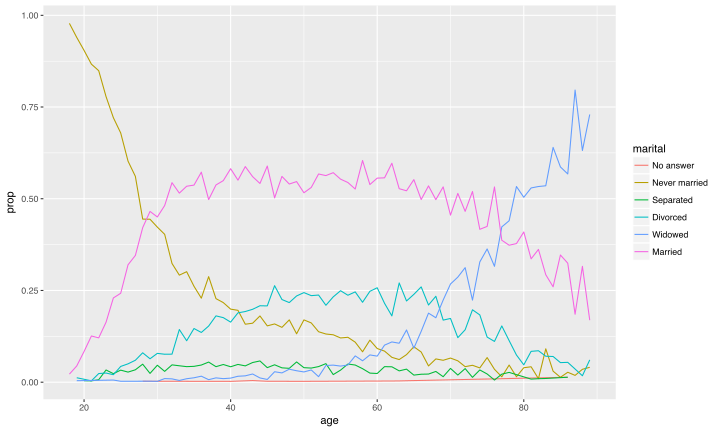

In [368]:
ggplot(by_age, aes(age, prop, colour = marital)) +
  geom_line(na.rm = TRUE)

The plot can be made slightly more readable by reordering the factors such that the color of the lines is ordered similarly to the lengend:

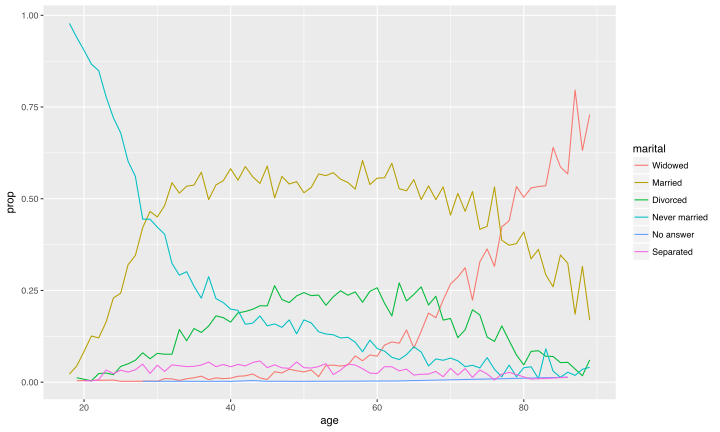

In [369]:
ggplot(by_age, aes(age, prop, colour = fct_reorder2(marital, age, prop))) +
  geom_line() +
  labs(colour = "marital")

Note that the ordering is such that the factors are ordered according to the value of `prop` at the max value of `age` (i.e., the values that are physically closest to the legend.)

Finally we have a couple of other useful commands. `fct_infreq(f)` will reorder the levels in `f` increasing frequency. This is useful with `geom_bar`:

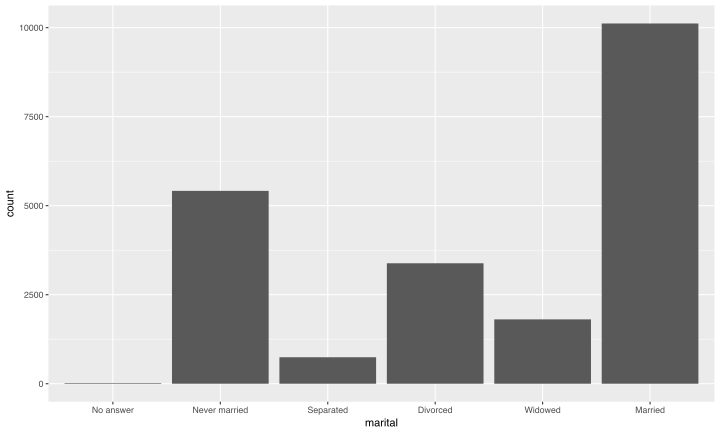

In [370]:
ggplot(gss_cat, aes(marital)) + geom_bar()

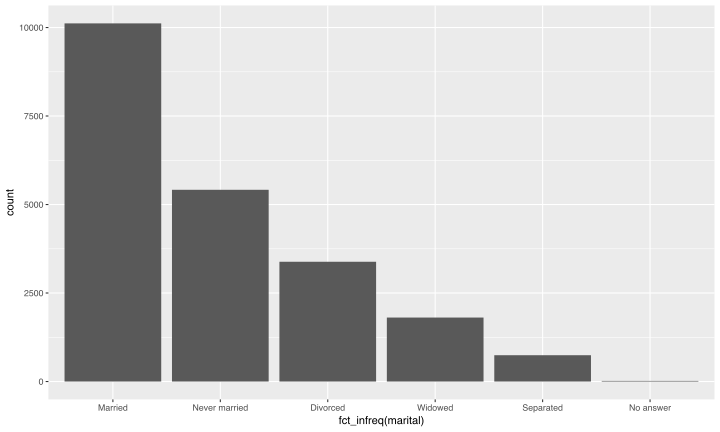

In [371]:
ggplot(gss_cat, aes(fct_infreq(marital))) + geom_bar()

`fct_rev` will reverse the order of a factor:

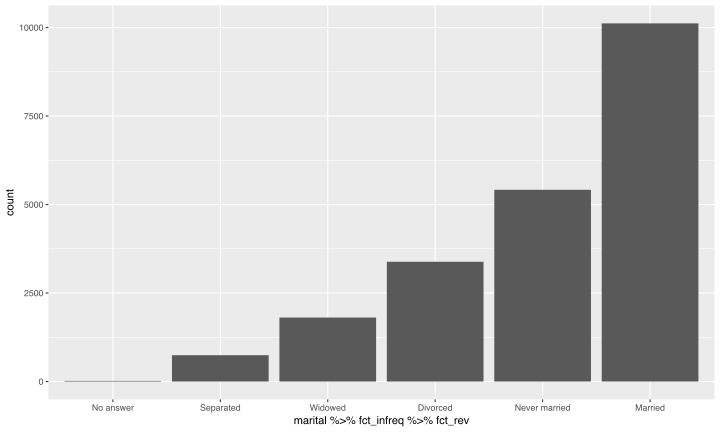

In [372]:
ggplot(gss_cat, aes(marital %>% fct_infreq %>% fct_rev)) + geom_bar()

### Altering levels
In many cases it is necessary to change the *values* of a factor, especially when generating plots and tables for publications. 

In [373]:
count(gss_cat, partyid)

   partyid            n   
1  No answer           154
2  Don't know            1
3  Other party         393
4  Strong republican  2314
5  Not str republican 3032
6  Ind,near rep       1791
7  Independent        4119
8  Ind,near dem       2499
9  Not str democrat   3690
10 Strong democrat    3490

The `fct_recode` command makes this easy. This command takes a factor and a set of `new_level=old_level` options:

In [374]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  count(partyid)

   partyid               n   
1  No answer              154
2  Don't know               1
3  Other party            393
4  Republican, strong    2314
5  Republican, weak      3032
6  Independent, near rep 1791
7  Independent           4119
8  Independent, near dem 2499
9  Democrat, weak        3690
10 Democrat, strong      3490

A useful feature of `fct_recode` is for combining multiple factors into one:

In [375]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican"            = "Strong republican",
    "Republican"            = "Not str republican",
    "Independent"           = "Ind,near rep",
    "Independent"           = "Ind,near dem",
    "Democrat"              = "Not str democrat",
    "Democrat"              = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

  partyid     n   
1 Other        548
2 Republican  5346
3 Independent 8409
4 Democrat    7180

If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [376]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("No answer", "Don't know", "Other party"),
    Republican = c("Strong republican", "Not str republican"),
    Independent = c("Ind,near rep", "Independent", "Ind,near dem"),
    Democrat = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

  partyid     n   
1 Other        548
2 Republican  5346
3 Independent 8409
4 Democrat    7180

## Dates
Most of us have a pretty firm grasp on dates. Nevertheless they can be more complicated than you might think. Consider these three questions from the book:
* Does every year have 365 days?
* Does every day have 24 hours?
* Does every minute have 60 seconds?

The answer to all three is "no".

As before, we'll rely on the `lubridate` package to work with dates:

In [377]:
library(lubridate)

There are three different date classes in R:

* A date, printed in tibble as `<date>`, represents a full day on the calendar.
* A time within a day, printed as `<time>`, represents a specific time within an (unspecified) day.
* A date-time is a date plus a time (tibble: `<dttm>`). A date-time uniquely identifies an instant in time (up to a given precision, usually 1 second.)

We've already seen examples of date-times in the `flights` tibble:

In [378]:
library(nycflights13)
select(flights, time_hour) %>% print

# A tibble: 336,776 x 1
             time_hour
                <dttm>
 1 2013-01-01 05:00:00
 2 2013-01-01 05:00:00
 3 2013-01-01 05:00:00
 4 2013-01-01 05:00:00
 5 2013-01-01 06:00:00
 6 2013-01-01 05:00:00
 7 2013-01-01 06:00:00
 8 2013-01-01 06:00:00
 9 2013-01-01 06:00:00
10 2013-01-01 06:00:00
# ... with 336,766 more rows


You should tend to favor working with dates over date-times if possible. The latter are more complicated because of the need to handle time zones.



We can get the current date and date-time using the `today()` and `now()` commands:

In [379]:
today()

[1] "2018-03-10"

In [380]:
now()

[1] "2018-03-10 15:30:19 EST"

### Converting strings to dates and times
Frequently you will be encounter date and/or time data stored as text. You will need to convert these data into the native R date classes in order to use date functions on them. The `mdy/ymd/dmy` functions accomplish this.

In [381]:
ymd("2017-01-31")

[1] "2017-01-31"

In [382]:
mdy("January 31st, 2017")

[1] "2017-01-31"

### Other languages
You might find yourself needing to parse dates in other languages. This will fail if the dates are in a language which is different from your system's language:

In [383]:
dmy("31 août 2017")

Warning message:
“All formats failed to parse. No formats found.”

[1] NA

Fix this by specifying the *locale* option:

In [384]:
dmy("31 août 2017", locale = "fr_FR")

[1] "2017-08-31"

In [385]:
dmy("31-Jan-2017")

[1] "2017-01-31"

#### Date-time parsers
There are also equivalent functions for parsing date-times:

In [386]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [387]:
mdy_hm("01/31/2017 08:01")


[1] "2017-01-31 08:01:00 UTC"

### Making a date-time from components
We saw in the `flights` table that date information can be spread across multiple columns. The `make_date` and `make_datetime` functions can make dates from these:

In [388]:
mutate(flights, date=make_date(year, month, day)) %>% 
    select(year, month, day, date) %>% 
    print

# A tibble: 336,776 x 4
    year month   day       date
   <int> <int> <int>     <date>
 1  2013     1     1 2013-01-01
 2  2013     1     1 2013-01-01
 3  2013     1     1 2013-01-01
 4  2013     1     1 2013-01-01
 5  2013     1     1 2013-01-01
 6  2013     1     1 2013-01-01
 7  2013     1     1 2013-01-01
 8  2013     1     1 2013-01-01
 9  2013     1     1 2013-01-01
10  2013     1     1 2013-01-01
# ... with 336,766 more rows


#### Example
The `flights` table has scheduled as well as actual arrival and departure times. Let's create a date-time variable from the actual departure time:

In [389]:
make_datetime_100 = function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

flights_dt = flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))

Now we can use built in R command to query and plot these data based on actual departure time:

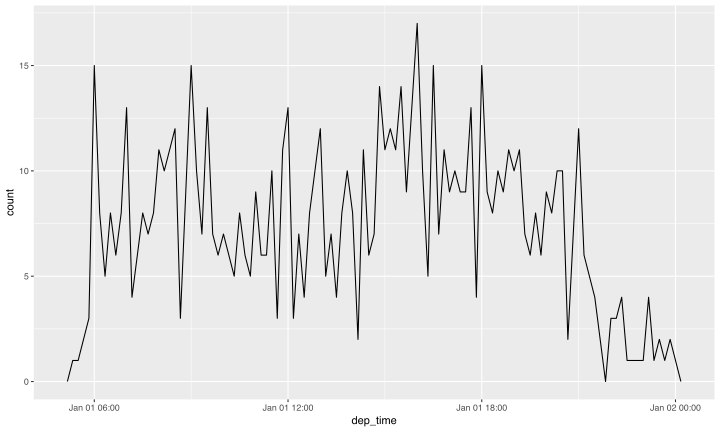

In [390]:
flights_dt %>% 
  filter(dep_time < ymd(20130102)) %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 600) # 600 s = 10 minutes

Notice that this command and resulting graph looks much nicer than if we did not use the date classes:
* The filter on `dep_time` looks more natural than `filter(day<2, month==1, year==2013)`.
* We can easily express the bin-width of 600 seconds in `geom_freqpoly(binwidth = 600)`. When you use date-times in a numeric context (like in a histogram), 1 means 1 second; for dates, 1 means 1 day.
* The plot x axis has nice readable labels.

### The epoch
UNIX systems sometimes represent time as "the number of seconds which have elapsed since 1-1-1970." This date is known as "the epoch". So you may occassionaly come across date-times that look like:

In [391]:
as.integer(now())

[1] 1520713819

To convert these to date format you can use `as_datetime`:

In [392]:
as_datetime(60 * 60 * 24 + 1)

[1] "1970-01-02 00:00:01 UTC"

### Date-time components
The functions `year()`, `month()`, `mday()` (day of the month), `yday()` (day of the year), `wday()` (day of the week), `hour()`, `minute()`, and `second()` can extract components from dates and times:

In [393]:
wday(mdy(c("Jan 1, 2001", "Sep 26, 1982", "March 12, 2018")), label=T)

[1] Mon Sun Mon
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

By extracting the minute component of scheduled departure time, we uncover a surprising pattern:

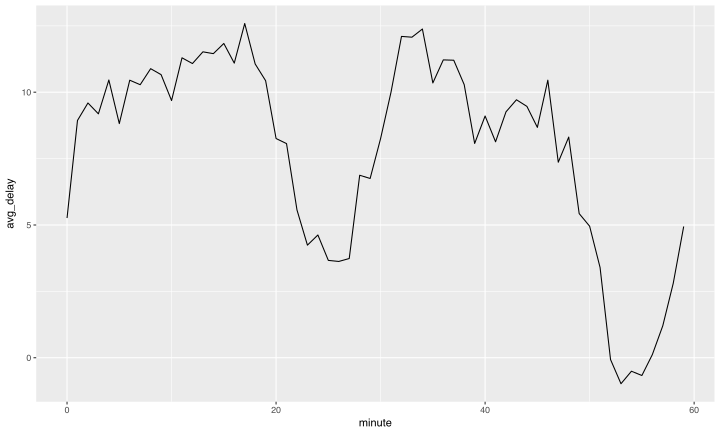

In [394]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

On the other hand, when grouped by scheduled departure time the delays seem to be random:

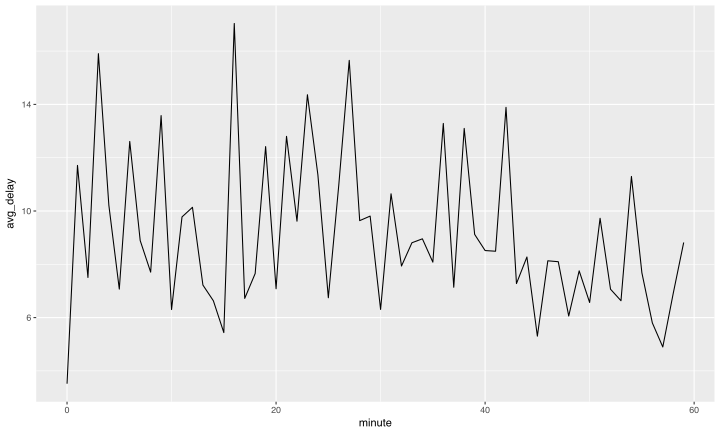

In [395]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

As explained by the book, there is a bias in scheduled departure times towards nice round numbers:

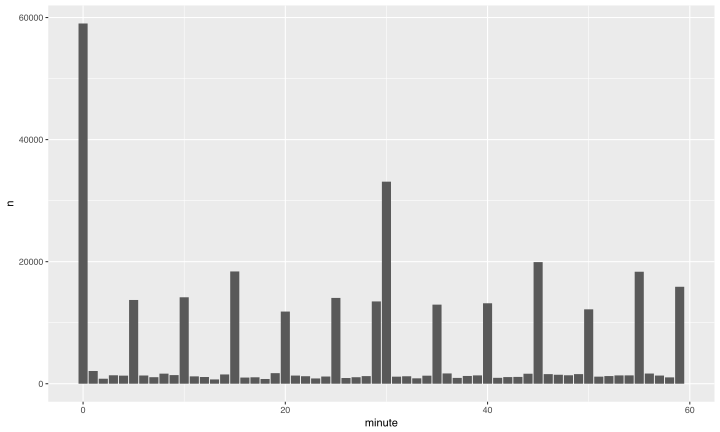

In [396]:
ggplot(sched_dep, aes(minute, n)) + geom_col()

#### As accessors
The component functions also work as accessors, meaning they can be used on the left-hand side of an assignment:

In [397]:
(d = today())
mday(d) = 24
d

[1] "2018-03-10"

[1] "2018-03-24"

To return a new (date)time rather than modifying in place, you can use the `update` command:

In [398]:
update(today(), year=2020)

[1] "2020-03-10"

### Time spans
Time spans are the difference between two time points. These are represented in R by the `difftime` class:

In [399]:
(d = today() - update(today(), year=2010))
class(d)

Time difference of 2922 days

[1] "difftime"

Because it is usually simpler to reason about time differences in terms of a single number, `lubridate` also provides a `duration` class which is stored in terms of seconds:

In [400]:
as.duration(1234)

[1] "1234s (~20.57 minutes)"

In [401]:
dseconds(10)

[1] "10s"

In [402]:
dweeks(3)

[1] "1814400s (~3 weeks)"

Arithmetic with durations works as you would expect:

In [403]:
2 * dyears(1)

[1] "63072000s (~2 years)"

In [404]:
dyears(1) + dweeks(12) + dhours(15)

[1] "38847600s (~1.23 years)"

You have to be careful when adding durations and dates. What is 1 day after last Saturday at 1pm?

In [405]:
last_saturday = mdy_hm("Mar. 10, 2018 13:00PM", tz="America/Detroit")
last_saturday + ddays(1)

[1] "2018-03-11 14:00:00 EDT"

To prevent this sort of thing from happening, `lubridate` also offers objects called "periods":

In [406]:
days(1)
class(days(1))

[1] "1d 0H 0M 0S"

[1] "Period"
attr(,"package")
[1] "lubridate"

In [407]:
last_saturday + days(1)

[1] "2018-03-11 13:00:00 EDT"

Similarly, periouds have the expected behaviour if you add one year to a leap year:

In [408]:
ymd("2016-01-01") + dyears(1)

[1] "2016-12-31"

In [409]:
ymd("2016-01-01") + years(1)

[1] "2017-01-01"

#### Example
Earlier in the semester we saw how some flights seem to have arrived before they departed:

In [410]:
filter(flights, arr_time < dep_time) %>% head %>% print

# A tibble: 6 x 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1     1929           1920         9        3              7
2  2013     1     1     1939           1840        59       29           2151
3  2013     1     1     2058           2100        -2        8           2359
4  2013     1     1     2102           2108        -6      146            158
5  2013     1     1     2108           2057        11       25             39
6  2013     1     1     2120           2130       -10       16             18
# ... with 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


This is because these are overnight flights. To fix this, we can now simply add one day to `arr_time`:

In [411]:
flights_dt = flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  )
flights_dt %>% 
  filter(overnight, arr_time < dep_time)  %>% print

# A tibble: 0 x 10
# ... with 10 variables: origin <chr>, dest <chr>, dep_delay <dbl>,
#   arr_delay <dbl>, dep_time <dttm>, sched_dep_time <dttm>, arr_time <dttm>,
#   sched_arr_time <dttm>, air_time <dbl>, overnight <lgl>


### Time zones
When we create a date-time, the default time zone is "UTC":

In [412]:
ymd_hm("2000-01-30 00:00")

[1] "2000-01-30 UTC"

This is a standard time zone which is, for historical reasons, equal to time in Greenwich, England.

If your times are coming from a different time zone you must specify using the `tz=` option:

In [413]:
ymd_hms("2017-01-31 20:11:59", tz="America/Detroit")
ymd_hms("2017-01-31 20:11:59", tz="America/Los_Angeles")

[1] "2017-01-31 20:11:59 EST"

[1] "2017-01-31 20:11:59 PST"

You can find your local time zone using:

In [414]:
Sys.timezone()

[1] "America/Detroit"

The command `OlsonNames()` will list all the possible time zones:

In [415]:
length(OlsonNames())
sample(OlsonNames(), 10)

[1] 592

 [1] "America/St_Barthelemy" "Canada/Atlantic"       "Africa/Lome"          
 [4] "Indian/Kerguelen"      "America/Hermosillo"    "Asia/Thimbu"          
 [7] "America/Belem"         "America/Resolute"      "Australia/Tasmania"   
[10] "America/Maceio"       